In [223]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(1618)
plt.style.use('ggplot')

In [224]:
# Initial Data Read

df = pd.read_csv('train.csv')

# Categorical Data Label Dictionaries
color = pd.read_csv('color_labels.csv')
breed = pd.read_csv('breed_labels.csv')
state = pd.read_csv('state_labels.csv')
typedic = {1:'dog', 2:'cat'}
genderdic = {1:'Male', 2:'Female', 3:'Mixed'}
maturitydic = {1:'Small', 2:'Medium', 3:'Large', 4:'Extra Large', 0:'Not Specified'}
furdic = {1:'Short', 2:'Medium', 3:'Long', 4:'Not Specified'}
vaccdic = {1:'Vaccinated', 2:'Not Vaccinated', 3:'No Info'}
wormdic = {1:'De-wormed', 2:'Not de-wormed', 3:'No Info'}
sterildic = {1:'Sterilized', 2:'Not sterilized', 3:'No Info'}
healthdic = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
adoptiondic = {0:  'First Day', 1: '1-7 Days', 2: '8-30 Days', 3:'31-90 Days', 4:'No Adoption'}
colordict = {0: 'NaN', 1: 'Black', 2: 'Brown', 3:'Golden', 4:'Yellow', 5:'Cream', 6:'Gray', 7:'White'}

df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [225]:
# Next 3 cells are for defining data properties, shape, size and desriptives.

list(df.columns)

['Type',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'AdoptionSpeed']

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [227]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


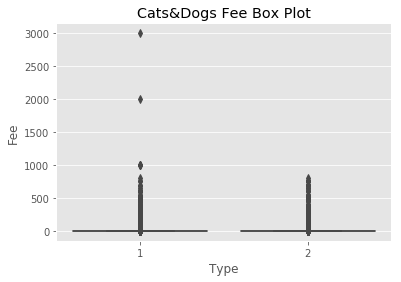

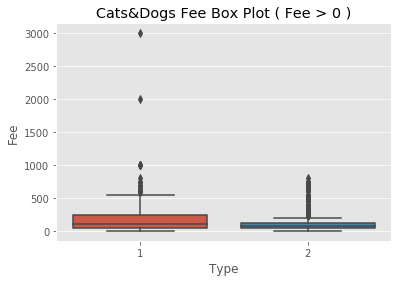

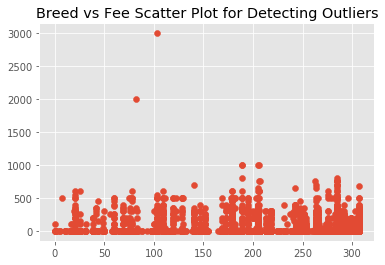

In [228]:
sns.boxplot(x=df.Type, y=df.Fee)
plt.title('Cats&Dogs Fee Box Plot')
plt.show()
sns.boxplot(x=df.Type, y=df[df.Fee > 0].Fee)
plt.title('Cats&Dogs Fee Box Plot ( Fee > 0 )')
plt.show()
plt.scatter(x=df.Breed1, y=df.Fee)
plt.title('Breed vs Fee Scatter Plot for Detecting Outliers')
plt.show()

# There are only couple of data pointsfor dogs, can be accepted as outliers, although outliers seems pretty random, needs special attention. Especially two data point shows clear outlier figures.

In [229]:
df[df.Fee >= 1000]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2078,1,Rottweiler - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Open for Adoption with Fees Looking for new lo...,ecad98f44,1.0,2
4844,1,Coda,7,206,0,2,6,7,0,3,...,1,1,1000,41335,d2a7c2889579271a07100d5668f5cf8f,0,She is pure breed Siberian husky. Born at July...,0038c9343,5.0,2
8722,1,Khaleesi And Drogo,4,103,0,3,1,2,0,3,...,1,2,3000,41325,39d5c79a7422fa53b8fdeaec67b3dbda,0,Both pups are family home trained. They love t...,e74dd0579,5.0,3
8834,1,Adpoted,24,205,0,2,1,2,7,1,...,1,1,1000,41401,67f04f1dc1f81ff09e134fb47a053b10,0,adpoted,aebf47483,2.0,0
8879,1,Rottweiler Semi-Adult - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Looking for new lovely home due to owner lack ...,c3b94defa,2.0,1
10477,1,Bull Dog,24,82,0,1,2,5,7,2,...,1,1,2000,41401,a1c7a4f20bb936fcb8d97039741c40be,0,Found this bull dog near my neighbourhood for ...,31a77d7ba,3.0,1


# There are 6 observations outliers for the price variable.

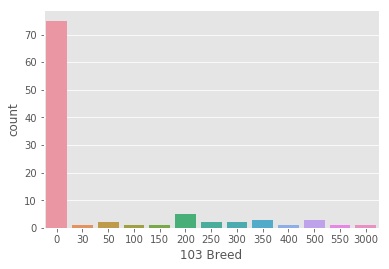

Priced pet cost average:  390.43 (Free pets are excluded)
Priced pet cost median:  250.0 (Free pets are excluded)


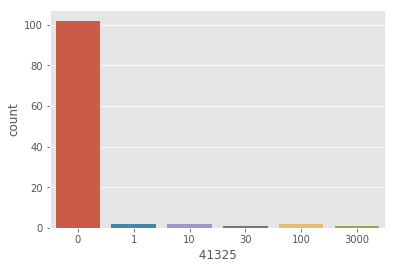

Priced pet cost average:  406.5 (Free pets are excluded)
Priced pet cost median:  20.0 (Free pets are excluded)


In [230]:
# $3000 outlier detail look.

sns.countplot(df[df.Breed1 == 103].Fee)
plt.xlabel(' 103 Breed ')
plt.show()

df103 = df[df.Breed1 == 103]
print('Priced pet cost average: ', round(df103[df103.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df103[df103.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41325].Fee)
plt.xlabel(' 41325 ')
plt.show()

df41325 = df[df.State == 41325]
print('Priced pet cost average: ', round(df41325[df41325.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41325[df41325.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Graphs shows that for both 103 coded breed and state 41325 have no data points showing that 3000 is acceptable data observation, this point is clearly an outlier.

# Among 103 breed, although most of the pets are free, the ones with adoption fees are between 30 - 550, 

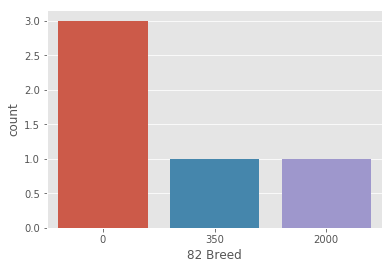

Priced pet cost average:  1175.0 (Free pets are excluded)
Priced pet cost median:  1175.0 (Free pets are excluded)


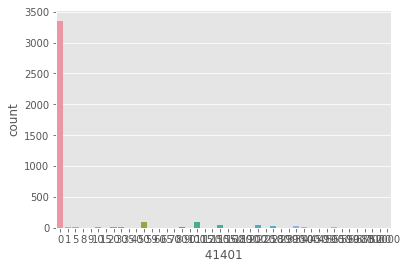

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [231]:
# $2000 outlier detail look.

sns.countplot(df[df.Breed1 == 82].Fee)
plt.xlabel(' 82 Breed ')
plt.show()

df82 = df[df.Breed1 == 82]
print('Priced pet cost average: ', round(df82[df82.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df82[df82.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Countplot shows that there are only two 82 coded Breed dogs available in the data set and one is without fee, other is 2000. The state wise pet prices are not high either, with mean 139.6 and median 100. 2000 fee can be accepted as outlier.

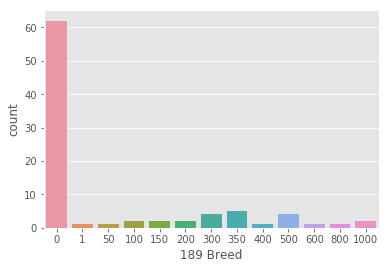

Priced pet cost average:  373.12 (Free pets are excluded)
Priced pet cost median:  350.0 (Free pets are excluded)


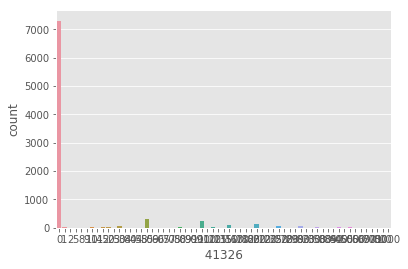

Priced pet cost average:  139.91 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [232]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 189].Fee)
plt.xlabel(' 189 Breed ')
plt.show()

df189 = df[df.Breed1 == 189]
print('Priced pet cost average: ', round(df189[df189.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df189[df189.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41326].Fee)
plt.xlabel(' 41326 ')
plt.show()

df41326 = df[df.State == 41326]
print('Priced pet cost average: ', round(df41326[df41326.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41326[df41326.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 189 breed prices are somewhat equally spreaded from 1 to 1000 and has a mean of 375 and median of 300. Among the same breed 1000 case might be real observation.
# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

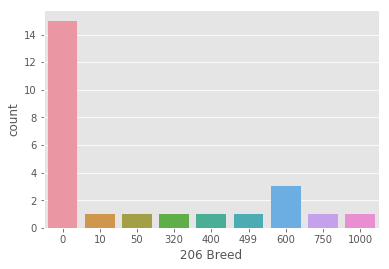

Priced pet cost average:  482.9 (Free pets are excluded)
Priced pet cost median:  549.5 (Free pets are excluded)


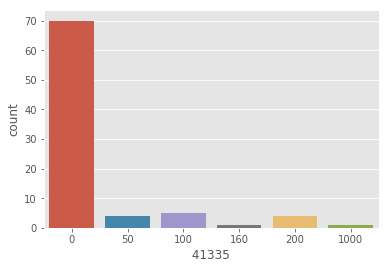

Priced pet cost average:  177.33 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [233]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 206].Fee)
plt.xlabel(' 206 Breed ')
plt.show()

df206 = df[df.Breed1 == 206]
print('Priced pet cost average: ', round(df206[df206.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df206[df206.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41335].Fee)
plt.xlabel(' 41335 ')
plt.show()

df41335 = df[df.State == 41335]
print('Priced pet cost average: ', round(df41335[df41335.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41335[df41335.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 206 breed prices are somewhat equally spreaded from 50 to 1000 and has a mean of 535 and median of 600. Among the same breed 1000 case might be real observation.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

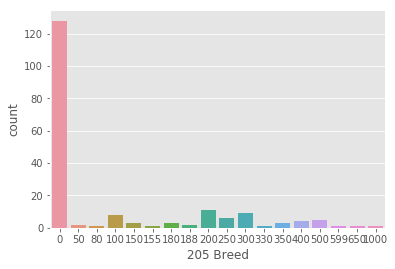

Priced pet cost average:  268.23 (Free pets are excluded)
Priced pet cost median:  225.0 (Free pets are excluded)


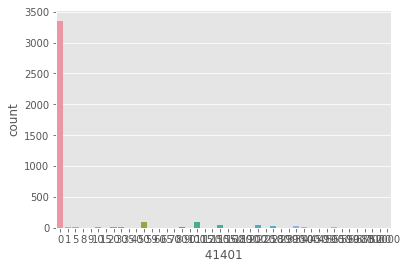

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [234]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 205].Fee)
plt.xlabel(' 205 Breed ')
plt.show()

df205 = df[df.Breed1 == 205]
print('Priced pet cost average: ', round(df205[df205.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df205[df205.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 205 breed prices are somewhat  spreaded from 100 to 1000 and has a mean of 337 and median of 300. Among the same breed 1000 case might be real outlier.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can be counted as outlier. But decision needs to be made.

# Among all possible outliers in Fee variable, only two records will be discarded as recordin errors.

In [235]:
# Outliers in Fee variable are excluded.

df = df[df.Fee <= 1000]

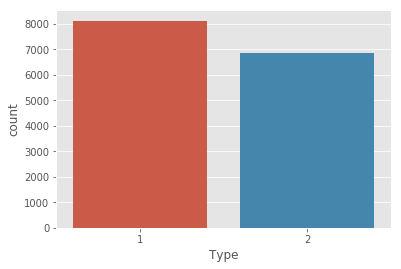

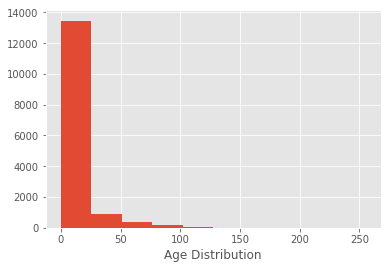

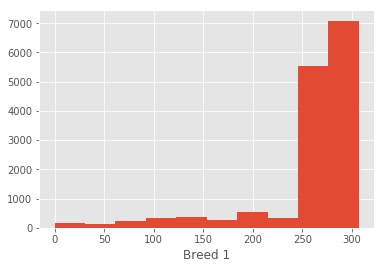

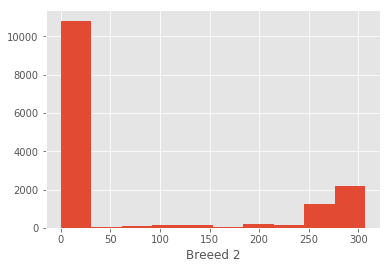

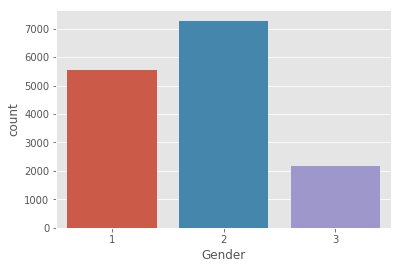

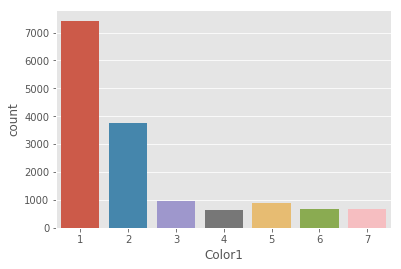

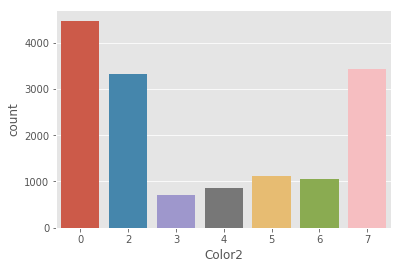

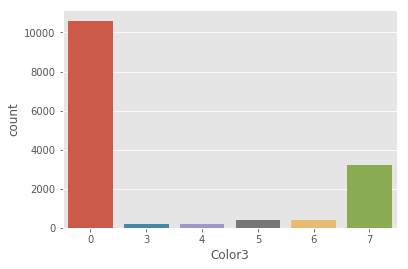

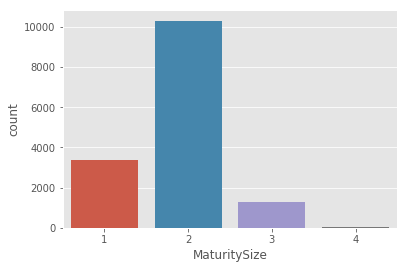

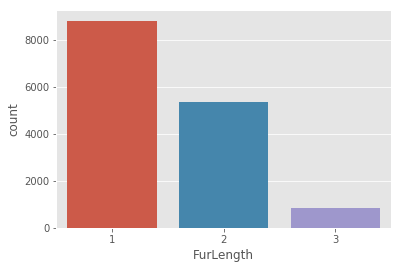

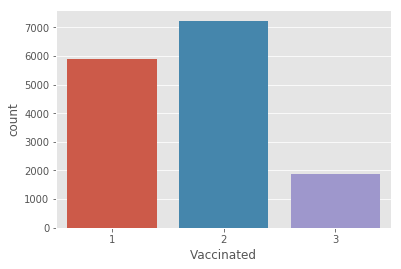

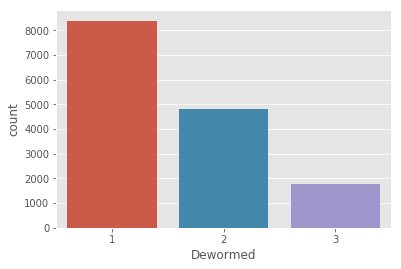

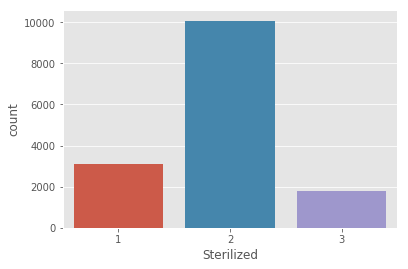

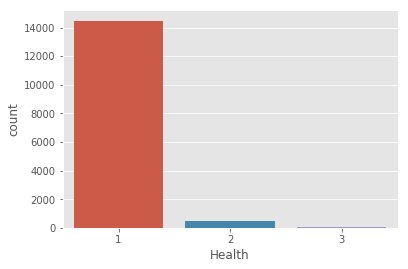

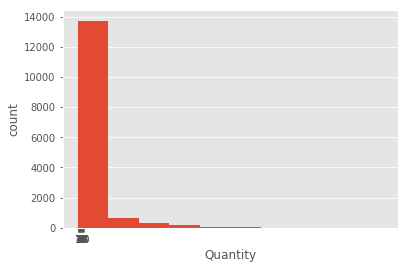

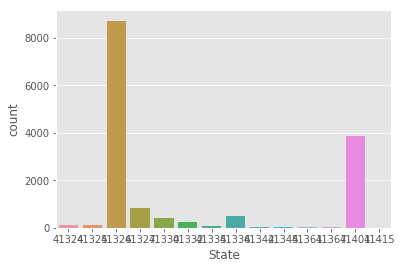

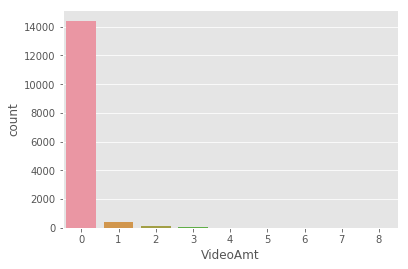

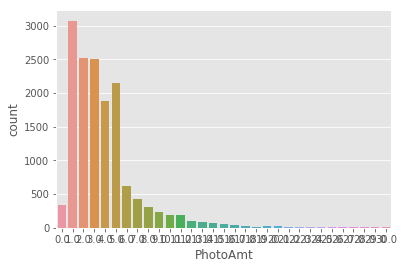

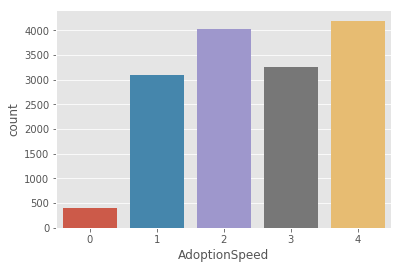

In [236]:
# Visual EDA, count plots for all variables. 
# Checking for imbalanced, skewed data. Detecting outliers.

j1 = sns.countplot(df.Type)
j1 = plt.show()
j2 = plt.hist(df.Age)
j2 = plt.xlabel('Age Distribution')
j2 = plt.show()
j3 = plt.hist(df.Breed1)
j3 = plt.xlabel('Breed 1')
j3 = plt.show()
j4 = plt.hist(df.Breed2)
j4 = plt.xlabel('Breeed 2')
j4 = plt.show()

for i in df.columns[5:16]:
    plt.figure()
    sns.countplot(df[i])

j5 = plt.hist(df.Fee)
j5 = plt.show()
j6 = sns.countplot(df.State)
j6 = plt.show()
j7 = sns.countplot(df.VideoAmt)
j7 = plt.show()

for i in df.columns[22:24]:
    plt.figure()
    sns.countplot(df[i])


## Age looks like exponential distribution, most of the pets rescued are puppies or kittens. There are extreme points 225 months old. 
# Outlier inspection is needed.

## Breed is highly complex and skewed. Most of the breeds are either, mixed breeds or unknown. 
# Upon further analyse, mixed breeds label might be disgregarded.

## Not all pets have secondary and third colors. First color variable is from 1-7, other 2 color variables has big pile on color code 0.
# This also needs to be taken into consideration, for further analyses.

## MaturitySize might have an outlier, most of the data is coded for the first three codes.

## Health also has couple extereme codes, might be an outlier.

## Quantity variable has almost no distribution. Almost all pets are only one.

## Statewise distribution is imbalanced. Might have demographic or economic reasons behind.

## Almost no pets have video.

## Picture amount varies but there might be extreme cases.

## Adoption speed seems consistent. But PetSaver focuses on identifying adoption logic and increasing the speed of adoption. And the time frame between codes are different. Time definitely has some effect on adoption. This might be modelled too.

In [237]:
# For computational ease, string variables are seperated.

df = df.drop(['Name', 'Description', 'RescuerID', 'PetID'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 14992
Data columns (total 20 columns):
Type             14991 non-null int64
Age              14991 non-null int64
Breed1           14991 non-null int64
Breed2           14991 non-null int64
Gender           14991 non-null int64
Color1           14991 non-null int64
Color2           14991 non-null int64
Color3           14991 non-null int64
MaturitySize     14991 non-null int64
FurLength        14991 non-null int64
Vaccinated       14991 non-null int64
Dewormed         14991 non-null int64
Sterilized       14991 non-null int64
Health           14991 non-null int64
Quantity         14991 non-null int64
Fee              14991 non-null int64
State            14991 non-null int64
VideoAmt         14991 non-null int64
PhotoAmt         14991 non-null float64
AdoptionSpeed    14991 non-null int64
dtypes: float64(1), int64(19)
memory usage: 3.0 MB


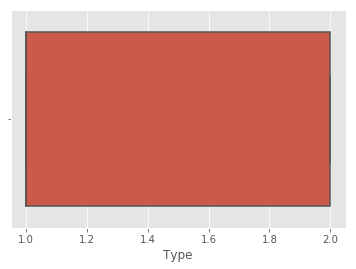

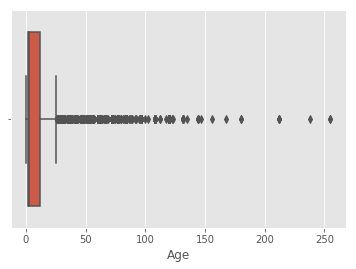

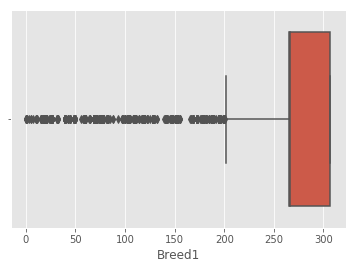

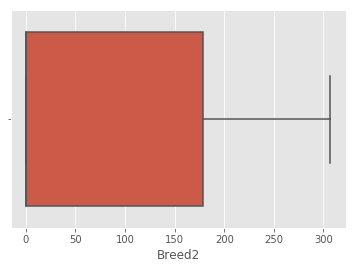

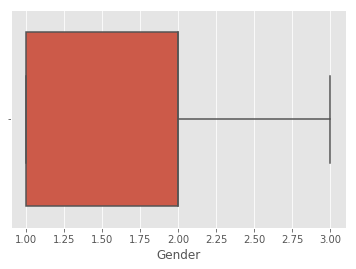

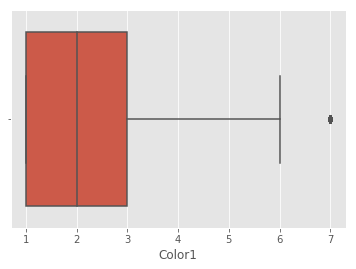

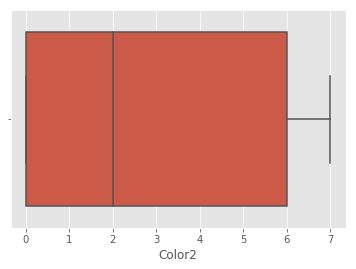

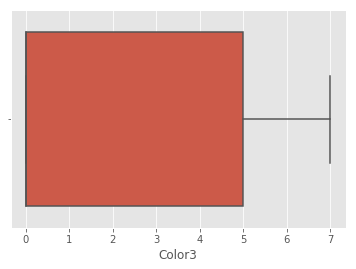

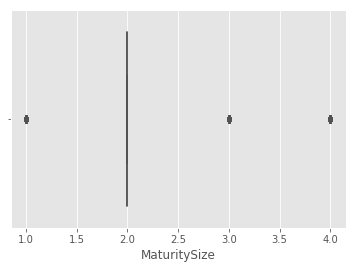

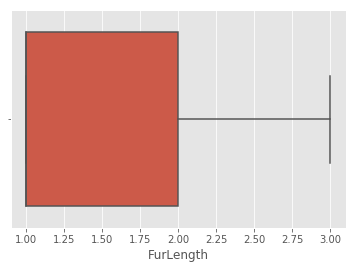

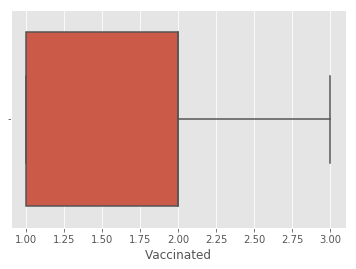

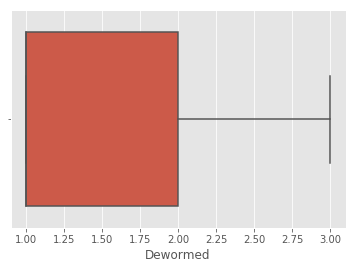

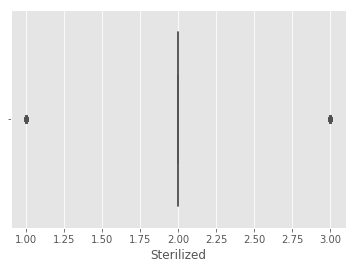

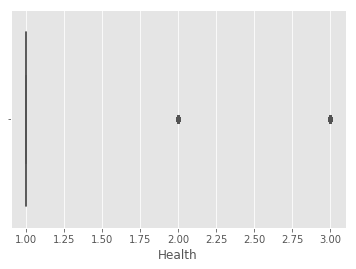

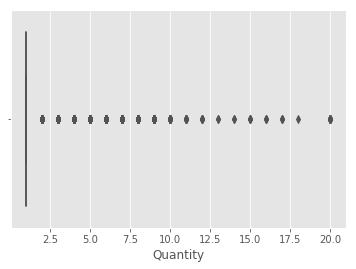

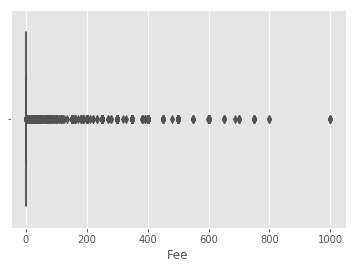

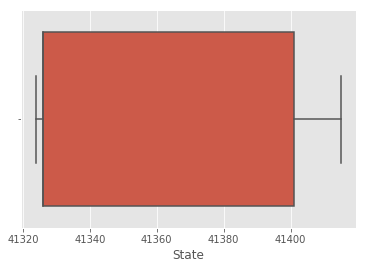

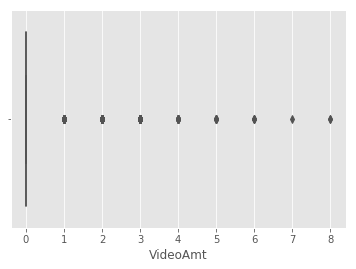

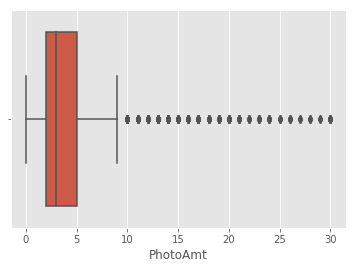

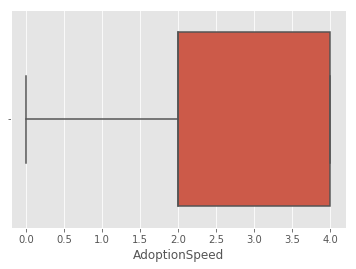

In [238]:
# Boxplots for more in depth visualizations to detect outliers. Not all boxplots will be useful but it is computationally easy to do
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()



## Since most pets are puppies or kittens, as we identified on the count plots, there are extreme cases in the data. There are too many cases above the IQR, this is because our data is highly skewed. Outliers should be defined with domain knowledge and statistical sense.

## As in the count plots, cumulation towards mixed breeds, holds the IQR on these breed codes.

## Since not too many pets have 2nd breed this data is also, tricky to use.

# Not many boxplots are meaningful, since there are 3 possible cases and all coded accordingly. But this is auto generated plotting, only meaningful plots are taken into consideration.

## Photo amount has some extreme cases, might be labeled as outliers. Count plot also supports.

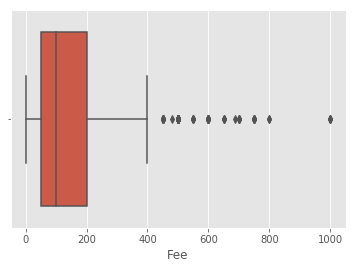

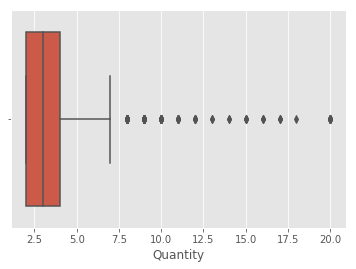

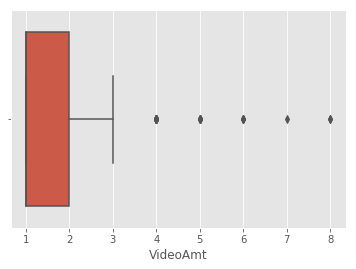

In [239]:
# It seems data has no missing points but some codings are effecting our judgement. For some highly effected variables,
# zero coded cases are treated as missing data points and boxplots are checked for outlie, detection.

sns.boxplot(df[df.Fee > 0].Fee)
plt.show()
sns.boxplot(df[df.Quantity > 1].Quantity)
plt.show()
sns.boxplot(df[df.VideoAmt > 0].VideoAmt)
plt.show()

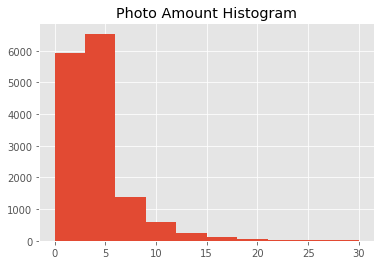

In [240]:
plt.hist(df.PhotoAmt)
plt.title('Photo Amount Histogram')
plt.show()

# Although 1000 data points for price didn't considered as outliers. Non-free price plot also indicates that there are quite some extreme prices, and we will re-evaluate our outlier borders for FEE variable.

# Most of the pets are unique and only one of its kind. Although, above box-plot excluded single pets, there are extreme values.

# Almost all of the data had no VideoAmt, when we exclude 0 cases, there are still couple extreme cases.

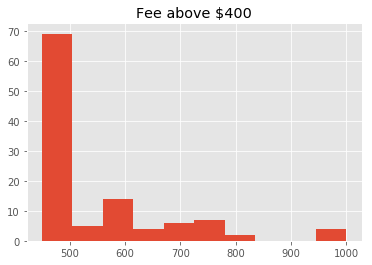

Fee > 400 Count:  111
Fee > 500 Count:  42
Fee > 600 Count:  23
Fee > 700 Count:  13
Fee > 800 Count:  4
Fee > 900 Count:  4
Fee > 1000 Count:  0


In [241]:
# Outliers in the Fee variable.

plt.hist(df[df.Fee > 400].Fee)
plt.title('Fee above $400')
plt.show()

print('Fee > 400 Count: ',df[df.Fee > 400].Fee.count())
print('Fee > 500 Count: ',df[df.Fee > 500].Fee.count())
print('Fee > 600 Count: ',df[df.Fee > 600].Fee.count())
print('Fee > 700 Count: ',df[df.Fee > 700].Fee.count())
print('Fee > 800 Count: ',df[df.Fee > 800].Fee.count())
print('Fee > 900 Count: ',df[df.Fee > 900].Fee.count())
print('Fee > 1000 Count: ',df[df.Fee > 1000].Fee.count())

# $600 seems another good cut point but to be conservative only $1000 cases will be marked as outliers and removed.

df = df[df.Fee < 1000]

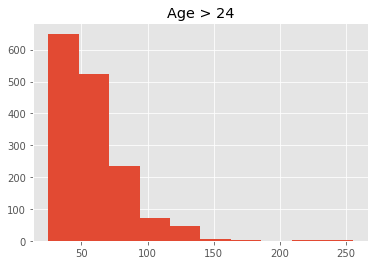

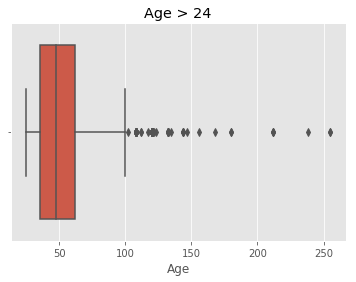

Age > 100 Count:  84
Age > 150 Count:  10
Age > 200 Count:  6
Age > 250 Count:  2


In [242]:
# Outliers in the Age variable.

plt.hist(df[df.Age > 24].Age)
plt.title('Age > 24')
plt.show()
plt.title('Age > 24')
sns.boxplot(df[df.Age > 24].Age)
plt.show()

print('Age > 100 Count: ', df[df.Age > 100].Age.count())
print('Age > 150 Count: ', df[df.Age > 150].Age.count())
print('Age > 200 Count: ', df[df.Age > 200].Age.count())
print('Age > 250 Count: ', df[df.Age > 250].Age.count())

# 100 months old, seems a good cutpoint but 150 months will be defined as outlier threshold.

df = df[df.Age < 150]

In [243]:
# Maturity Size in detail

for i, j in maturitydic.items():
    count = df[df.MaturitySize == i].MaturitySize.count()
    perc = round(count/len(df.MaturitySize),3)
    print(j, ' Count: ', count, ' -- Percentage : ', perc ) 

Small  Count:  3393  -- Percentage :  0.227
Medium  Count:  10295  -- Percentage :  0.687
Large  Count:  1256  -- Percentage :  0.084
Extra Large  Count:  33  -- Percentage :  0.002
Not Specified  Count:  0  -- Percentage :  0.0


In [244]:
#Health in detail

for i, j in healthdic.items():
    count = df[df.Health == i].Health.count()
    perc = round(count/len(df.Health),3)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)
    


Healthy  Count:  14462  -- Percentage:  0.966
Minor Injury  Count:  481  -- Percentage:  0.032
Serious Injury  Count:  34  -- Percentage:  0.002
Not Specified  Count:  0  -- Percentage:  0.0


In [245]:
# Checking Adoption Speed

for i, j in adoptiondic.items():
    count = df[df.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(df.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)    


First Day  Count:  409  -- Percentage:  0.03
1-7 Days  Count:  3088  -- Percentage:  0.21
8-30 Days  Count:  4034  -- Percentage:  0.27
31-90 Days  Count:  3254  -- Percentage:  0.22
No Adoption  Count:  4192  -- Percentage:  0.28


<Figure size 1080x1080 with 0 Axes>

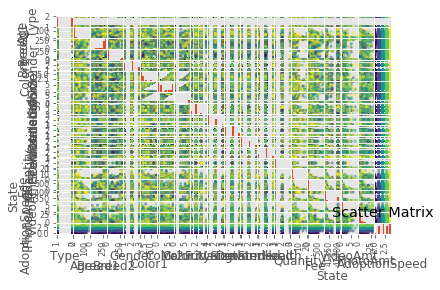

In [24]:
plt.figure(figsize=(30,30))
pd.plotting.scatter_matrix(df, c=df.AdoptionSpeed)
plt.title('Scatter Matrix')
plt.show()

In [246]:
# Recoding Color Variable
df.Color3.replace(0, df.Color1, inplace=True)
df.Color2.replace(0, df.Color1, inplace=True)

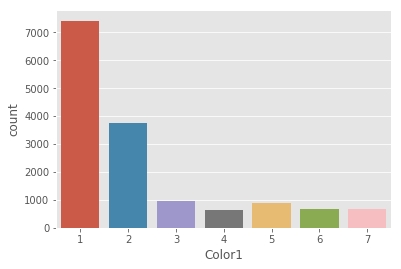

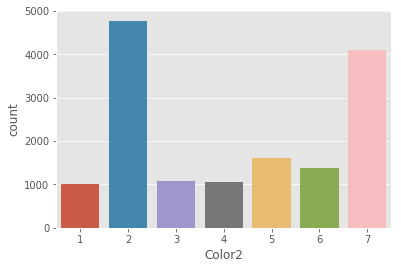

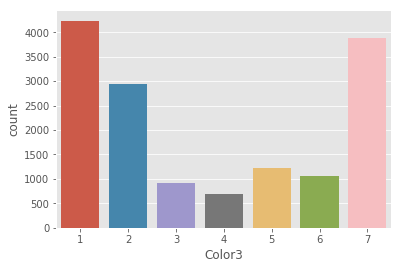

In [247]:
sns.countplot(df.Color1)
plt.show()
sns.countplot(df.Color2)
plt.show()
sns.countplot(df.Color3)
plt.show()

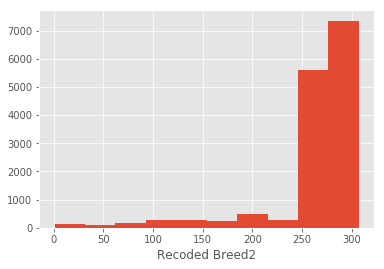

In [248]:
# Recoding Breed variable
df.Breed2.replace(0, df.Breed1, inplace=True)

plt.hist(df.Breed2)
plt.xlabel('Recoded Breed2')
plt.show()

In [249]:
dff = df.groupby('Type')

In [250]:
dff.describe()

AdoptionSpeed                                                  Age  \
             count      mean       std  min  25%  50%  75%  max   count   
Type                                                                      
1           8119.0  2.615100  1.143778  0.0  2.0  3.0  4.0  4.0  8119.0   
2           6858.0  2.399242  1.205263  0.0  1.0  2.0  4.0  4.0  6858.0   

                ...  Vaccinated      VideoAmt                               \
           mean ...         75%  max    count      mean      std  min  25%   
Type            ...                                                          
1     12.737283 ...         2.0  3.0   8119.0  0.058751  0.36457  0.0  0.0   
2      7.458589 ...         2.0  3.0   6858.0  0.054389  0.32330  0.0  0.0   

                     
      50%  75%  max  
Type                 
1     0.0  0.0  8.0  
2     0.0  0.0  6.0  

[2 rows x 152 columns]

In [251]:
df = df.rename(columns={'Breed1' : 'zBreed1', 'Breed2' : 'zBreed2', 'State' : 'zState'})
df = df.reindex(sorted(df.columns), axis=1)
df.head(2)

,AdoptionSpeed,Age,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,Sterilized,Type,Vaccinated,VideoAmt,zBreed1,zBreed2,zState
0,2,3,1,7,1,2,100,1,1,1,1,1.0,1,2,2,2,0,299,299,41326
1,0,1,1,2,1,3,0,2,1,1,2,2.0,1,3,2,3,0,265,265,41401


In [252]:
dog = df[df.Type == 1]
cat = df[df.Type == 2]

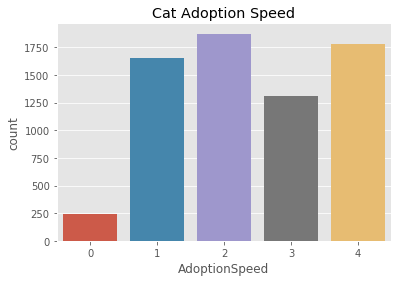

CATS
First Day  Count:  240  -- Percentage:  0.03
1-7 Days  Count:  1655  -- Percentage:  0.24
8-30 Days  Count:  1873  -- Percentage:  0.27
31-90 Days  Count:  1307  -- Percentage:  0.19
No Adoption  Count:  1783  -- Percentage:  0.26
 


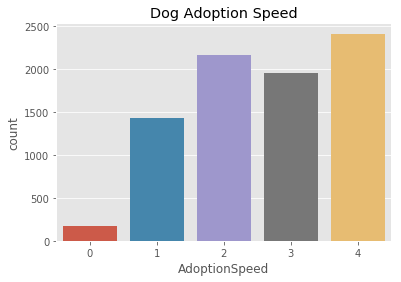

DOGS
First Day  Count:  169  -- Percentage:  0.02
1-7 Days  Count:  1433  -- Percentage:  0.18
8-30 Days  Count:  2161  -- Percentage:  0.27
31-90 Days  Count:  1947  -- Percentage:  0.24
No Adoption  Count:  2409  -- Percentage:  0.3


In [253]:
sns.countplot(cat.AdoptionSpeed)
plt.title('Cat Adoption Speed')
plt.show()

print('CATS')
for i, j in adoptiondic.items():
    count = cat[cat.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(cat.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)

print(' ')

sns.countplot(dog.AdoptionSpeed)
plt.title('Dog Adoption Speed')
plt.show()

print('DOGS')
for i, j in adoptiondic.items():
    count = dog[dog.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(dog.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)

In [254]:
# Are there any differences between two types of pets, adoption speed. 
# H0 : Medians of the both groups are equal.
# Ha : Medians of the both groups are not equal.

print(stats.kruskal(cat.AdoptionSpeed, dog.AdoptionSpeed))

# There is a significant difference between cats and dogs. They are coming from different populations.

KruskalResult(statistic=121.00151808531426, pvalue=3.8183961327530204e-28)


In [255]:
for i in dog.columns:
    print('Adoption Speed and', i, 'Crosstab for DOGS')
    print(' ')
    print(pd.crosstab(dog.AdoptionSpeed, dog[i]))
    print(' ')

Adoption Speed and AdoptionSpeed Crosstab for DOGS
 
AdoptionSpeed    0     1     2     3     4
AdoptionSpeed                             
0              169     0     0     0     0
1                0  1433     0     0     0
2                0     0  2161     0     0
3                0     0     0  1947     0
4                0     0     0     0  2409
 
Adoption Speed and Age Crosstab for DOGS
 
Age            0    1    2    3    4    5    6    7    8    9   ...   102  \
AdoptionSpeed                                                   ...         
0                3   19   44   13    6    2    5    1    1    1 ...     0   
1               24  289  400  151   67   34   30   15    9   12 ...     0   
2               25  443  635  270  101   58   32   19   40   30 ...     0   
3               20  341  482  253  122   53   57   32   35   19 ...     0   
4               13  196  423  252  178   93   99   52   70   37 ...     1   

Age            108  112  117  120  122  123  132  135  144  


# Adoption Speed and Age relation needs special care, there is a big increase among 24 months of age pets. And 1-5 months are most popular ages.

# Black and Brown colors are most popular colors. Gray and White is also favorable.

# Deworming is important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption.

# Gender is not an important criteria but Female pets are slightly favorable.

# Healthy pets are favorable.

# Medium sized dogs are popular sized pets.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of dogs.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is not so important.

# Video is not the primary criteria.

# Breed matters but since the biggest proportion is labeled as Mixed Breed, needs special care.

# There are either pet friendly states or pet available states, this needs further examination.

In [256]:
for i in cat.columns:
    print('Adoption Speed and', i, 'Crosstab for CATS')
    print(' ')
    print(pd.crosstab(cat.AdoptionSpeed, cat[i]))
    print(' ')

Adoption Speed and AdoptionSpeed Crosstab for CATS
 
AdoptionSpeed    0     1     2     3     4
AdoptionSpeed                             
0              240     0     0     0     0
1                0  1655     0     0     0
2                0     0  1873     0     0
3                0     0     0  1307     0
4                0     0     0     0  1783
 
Adoption Speed and Age Crosstab for CATS
 
Age            0    1    2    3    4    5    6    7    8    9   ...   84   \
AdoptionSpeed                                                   ...         
0                7   35   71   31   18    5   15    6    3    4 ...     1   
1               26  354  465  257  144   66   50   28   26   12 ...     3   
2               19  311  485  316  164   99   85   39   27   21 ...     3   
3               19  170  301  205  137   82   58   30   35   12 ...     4   
4               23  146  197  218  171  103  127   58   61   36 ...     5   

Age            89   92   96   108  112  120  132  144  147  


# 1-5 months are most popular ages.

# Color preference spread among the colors.

# Deworming is not important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption. Short furs are more favorable.

# Gender is not an important criteria.

# Healthy pets are favorable.

# Medium sized cats are popular sized pets. Large sizes are less likely to be adopted.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of cats.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is important.

# Video is not the primary criteria.

# Breed matters among the cats.

# There are either pet friendly states or pet available states, this needs further examination.

In [257]:
# Is there any relation among the dependent and independent variable?

for i in df.columns:
    for j in df.columns:
        ctab = pd.crosstab(df[i], df[j])
        ctab = np.array(ctab)
        chi, p, degf, expe = stats.chi2_contingency(ctab)
        print(i, ' vs', j)
        print(' ')
        #print('Chi-Squared Results: ', round(p, 4))
        if p< 0.05:
            print(' ')
            print('H0 is rejected.', i, ' and', j, ' independent from each other')
        else:
            print("H0 can't be rejected.", i, ' and', j, 'are not independent from each other')
        print(' ')

AdoptionSpeed  vs AdoptionSpeed
 
 
H0 is rejected. AdoptionSpeed  and AdoptionSpeed  independent from each other
 
AdoptionSpeed  vs Age
 
 
H0 is rejected. AdoptionSpeed  and Age  independent from each other
 
AdoptionSpeed  vs Color1
 
 
H0 is rejected. AdoptionSpeed  and Color1  independent from each other
 
AdoptionSpeed  vs Color2
 
 
H0 is rejected. AdoptionSpeed  and Color2  independent from each other
 
AdoptionSpeed  vs Color3
 
 
H0 is rejected. AdoptionSpeed  and Color3  independent from each other
 
AdoptionSpeed  vs Dewormed
 
 
H0 is rejected. AdoptionSpeed  and Dewormed  independent from each other
 
AdoptionSpeed  vs Fee
 
 
H0 is rejected. AdoptionSpeed  and Fee  independent from each other
 
AdoptionSpeed  vs FurLength
 
 
H0 is rejected. AdoptionSpeed  and FurLength  independent from each other
 
AdoptionSpeed  vs Gender
 
 
H0 is rejected. AdoptionSpeed  and Gender  independent from each other
 
AdoptionSpeed  vs Health
 
 
H0 is rejected. AdoptionSpeed  and Health

Color3  vs Type
 
 
H0 is rejected. Color3  and Type  independent from each other
 
Color3  vs Vaccinated
 
 
H0 is rejected. Color3  and Vaccinated  independent from each other
 
Color3  vs VideoAmt
 
H0 can't be rejected. Color3  and VideoAmt are not independent from each other
 
Color3  vs zBreed1
 
 
H0 is rejected. Color3  and zBreed1  independent from each other
 
Color3  vs zBreed2
 
 
H0 is rejected. Color3  and zBreed2  independent from each other
 
Color3  vs zState
 
 
H0 is rejected. Color3  and zState  independent from each other
 
Dewormed  vs AdoptionSpeed
 
 
H0 is rejected. Dewormed  and AdoptionSpeed  independent from each other
 
Dewormed  vs Age
 
 
H0 is rejected. Dewormed  and Age  independent from each other
 
Dewormed  vs Color1
 
 
H0 is rejected. Dewormed  and Color1  independent from each other
 
Dewormed  vs Color2
 
 
H0 is rejected. Dewormed  and Color2  independent from each other
 
Dewormed  vs Color3
 
 
H0 is rejected. Dewormed  and Color3  independent

Health  vs Dewormed
 
 
H0 is rejected. Health  and Dewormed  independent from each other
 
Health  vs Fee
 
H0 can't be rejected. Health  and Fee are not independent from each other
 
Health  vs FurLength
 
 
H0 is rejected. Health  and FurLength  independent from each other
 
Health  vs Gender
 
 
H0 is rejected. Health  and Gender  independent from each other
 
Health  vs Health
 
 
H0 is rejected. Health  and Health  independent from each other
 
Health  vs MaturitySize
 
 
H0 is rejected. Health  and MaturitySize  independent from each other
 
Health  vs PhotoAmt
 
H0 can't be rejected. Health  and PhotoAmt are not independent from each other
 
Health  vs Quantity
 
H0 can't be rejected. Health  and Quantity are not independent from each other
 
Health  vs Sterilized
 
 
H0 is rejected. Health  and Sterilized  independent from each other
 
Health  vs Type
 
H0 can't be rejected. Health  and Type are not independent from each other
 
Health  vs Vaccinated
 
 
H0 is rejected. Health

Sterilized  vs VideoAmt
 
 
H0 is rejected. Sterilized  and VideoAmt  independent from each other
 
Sterilized  vs zBreed1
 
 
H0 is rejected. Sterilized  and zBreed1  independent from each other
 
Sterilized  vs zBreed2
 
 
H0 is rejected. Sterilized  and zBreed2  independent from each other
 
Sterilized  vs zState
 
 
H0 is rejected. Sterilized  and zState  independent from each other
 
Type  vs AdoptionSpeed
 
 
H0 is rejected. Type  and AdoptionSpeed  independent from each other
 
Type  vs Age
 
 
H0 is rejected. Type  and Age  independent from each other
 
Type  vs Color1
 
 
H0 is rejected. Type  and Color1  independent from each other
 
Type  vs Color2
 
 
H0 is rejected. Type  and Color2  independent from each other
 
Type  vs Color3
 
 
H0 is rejected. Type  and Color3  independent from each other
 
Type  vs Dewormed
 
 
H0 is rejected. Type  and Dewormed  independent from each other
 
Type  vs Fee
 
 
H0 is rejected. Type  and Fee  independent from each other
 
Type  vs FurLe

zBreed2  vs Fee
 
 
H0 is rejected. zBreed2  and Fee  independent from each other
 
zBreed2  vs FurLength
 
 
H0 is rejected. zBreed2  and FurLength  independent from each other
 
zBreed2  vs Gender
 
 
H0 is rejected. zBreed2  and Gender  independent from each other
 
zBreed2  vs Health
 
 
H0 is rejected. zBreed2  and Health  independent from each other
 
zBreed2  vs MaturitySize
 
 
H0 is rejected. zBreed2  and MaturitySize  independent from each other
 
zBreed2  vs PhotoAmt
 
H0 can't be rejected. zBreed2  and PhotoAmt are not independent from each other
 
zBreed2  vs Quantity
 
H0 can't be rejected. zBreed2  and Quantity are not independent from each other
 
zBreed2  vs Sterilized
 
 
H0 is rejected. zBreed2  and Sterilized  independent from each other
 
zBreed2  vs Type
 
 
H0 is rejected. zBreed2  and Type  independent from each other
 
zBreed2  vs Vaccinated
 
 
H0 is rejected. zBreed2  and Vaccinated  independent from each other
 
zBreed2  vs VideoAmt
 
 
H0 is rejected. zBree

In [259]:
df_bu = df

In [212]:
# MACHINE LEARNING

In [213]:
mldf = df

labels = {'Color1':colordict, 'Color2':colordict, 'Color3':colordict, 'Dewormed':wormdic, 'FurLength':furdic
          , 'Gender':genderdic, 'Health':healthdic, 'MaturitySize':maturitydic, 'Sterilized':sterildic, 'Type':typedic
          , 'Vaccinated':vaccdic}

mldf.replace(labels, inplace=True)

mldf.head()

,AdoptionSpeed,Age,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,Sterilized,Type,Vaccinated,VideoAmt,zBreed1,zBreed2,zState
0,2,3,Black,White,Black,Not de-wormed,100,Short,Male,Healthy,Small,1.0,1,Not sterilized,cat,Not Vaccinated,0,299,299,41326
1,0,1,Black,Brown,Black,No Info,0,Medium,Male,Healthy,Medium,2.0,1,No Info,cat,No Info,0,265,265,41401
2,3,1,Brown,White,Brown,De-wormed,0,Medium,Male,Healthy,Medium,7.0,1,Not sterilized,dog,Vaccinated,0,307,307,41326
3,2,4,Black,Brown,Black,De-wormed,150,Short,Female,Healthy,Medium,8.0,1,Not sterilized,dog,Vaccinated,0,307,307,41401
4,2,1,Black,Black,Black,Not de-wormed,0,Short,Male,Healthy,Medium,3.0,1,Not sterilized,dog,Not Vaccinated,0,307,307,41326


In [214]:
mldf = pd.get_dummies(mldf, drop_first=True)
mldf.head()

,AdoptionSpeed,Age,Fee,PhotoAmt,Quantity,VideoAmt,zBreed1,zBreed2,zState,Color1_Brown,...,Health_Minor Injury,Health_Serious Injury,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,Sterilized_Not sterilized,Sterilized_Sterilized,Type_dog,Vaccinated_Not Vaccinated,Vaccinated_Vaccinated
0,2,3,100,1.0,1,0,299,299,41326,0,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,2.0,1,0,265,265,41401,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,0,7.0,1,0,307,307,41326,1,...,0,0,0,1,0,1,0,1,0,1
3,2,4,150,8.0,1,0,307,307,41401,0,...,0,0,0,1,0,1,0,1,0,1
4,2,1,0,3.0,1,0,307,307,41326,0,...,0,0,0,1,0,1,0,1,1,0


In [215]:
mldf.columns

Index(['AdoptionSpeed', 'Age', 'Fee', 'PhotoAmt', 'Quantity', 'VideoAmt',
       'zBreed1', 'zBreed2', 'zState', 'Color1_Brown', 'Color1_Cream',
       'Color1_Golden', 'Color1_Gray', 'Color1_White', 'Color1_Yellow',
       'Color2_Brown', 'Color2_Cream', 'Color2_Golden', 'Color2_Gray',
       'Color2_White', 'Color2_Yellow', 'Color3_Brown', 'Color3_Cream',
       'Color3_Golden', 'Color3_Gray', 'Color3_White', 'Color3_Yellow',
       'Dewormed_No Info', 'Dewormed_Not de-wormed', 'FurLength_Medium',
       'FurLength_Short', 'Gender_Male', 'Gender_Mixed', 'Health_Minor Injury',
       'Health_Serious Injury', 'MaturitySize_Large', 'MaturitySize_Medium',
       'MaturitySize_Small', 'Sterilized_Not sterilized',
       'Sterilized_Sterilized', 'Type_dog', 'Vaccinated_Not Vaccinated',
       'Vaccinated_Vaccinated'],
      dtype='object')

In [216]:
tempdf = mldf[['zBreed1', 'zBreed2', 'zState']]

mldf = mldf.drop(['zBreed1', 'zBreed2', 'zState'], axis=1)

In [217]:
from sklearn.model_selection import train_test_split, cross_val_score

y = mldf.AdoptionSpeed.values

X = mldf.drop('AdoptionSpeed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1618, stratify=y)

from sklearn.neighbors import KNeighborsClassifier

In [219]:

knn_perf = []
y_knn = np.empty(20)

for i in list(filter(lambda x: x % 2 != 0, list(range(1,20)))): 
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    knn_perf.append(cv_knn.mean())
    
# Version without CV

#neighbor=np.arange(1,11)
#knn_scr = np.empty(10)
#knn_scrt = np.empty(10)

#for i in range(1,10):
#    knn = KNeighborsClassifier(n_neighbors=i+1)
#    knn.fit(X_train, y_train)
#    knn_scrt[i] = knn.score(X_train, y_train)
#    knn_scr[i] = knn.score(X_test, y_test)
    
#knn_plot = plt.plot(neighbor, knn_scr, color='blue')
#knn_plot = plt.plot(neighbor, knn_scrt, color='orange')
#knn_plot = plt.title('kNN Train and Test Accuracy Chart')
#knn_plot = plt.legend(['Basic kNN Score', 'Training Score'])
#knn_plot = plt.show()

#print(knn_scr[5])



[0.3067390404932956, 0.29396855058375115, 0.31667122084172356, 0.3279382318616079, 0.32835416653359506, 0.3402046828552405, 0.34070617960884836, 0.3389529438740973, 0.34454716789627815, 0.3431271952089636]


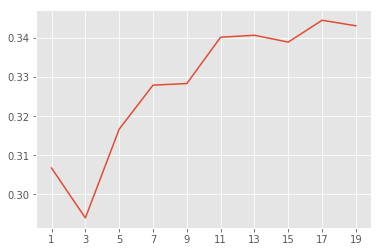

In [220]:
print(knn_perf, )
plt.plot(list(filter(lambda x: x % 2 != 0, list(range(1,20)))), knn_perf)
plt.xticks(list(filter(lambda x: x % 2 != 0, list(range(1,20)))))
plt.show()

In [57]:
# Some Preliminary Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [44]:
%%time

# Off the shelf Random Forest
rf = RandomForestClassifier()
cv_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print('Off the shelf Random Forest 10 Fold CV Score')
print(cv_rf.mean())
print(' ')

#Parameter Tuning with RandomGrid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=50, cv=3)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Off the shelf Random Forest 10 Fold CV Score
0.33386774489779947
 
{'n_estimators': 911, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Wall time: 39min 30s


In [45]:
rf_random.score(X_test, y_test)

0.38985313751668893

In [58]:
#Some SVM 
from sklearn.svm import SVC

In [47]:
%%time

svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)
svc_score = svc.score(X_test, y_test)
print('Off the shelf SVC Score')
print(svc_score)
print(svc.get_params)
print(' ')

svc_c = [0.01, 0.1, 1, 10, 100]
svc_g = [0.1, 1, 10]
svc_k = ['rbf']

svc_grid = {'C':svc_c, 'gamma':svc_g, 'kernel': svc_k}

svc_random = RandomizedSearchCV(svc, svc_grid, n_iter=10, cv=3)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

Off the shelf SVC Score
0.369826435246996
<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>
 
{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Wall time: 15min 29s


In [48]:
svc_random.score(X_test, y_test)

0.37550066755674233

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [50]:
%%time

logreg = LogisticRegression(multi_class='auto')
logreg.fit(X_train, y_train)
y_logreg = logreg.predict(X_test)

logreg_score = logreg.score(X_test, y_test)
print(logreg_score)

solver = ['newton-cg', 'liblinear']
logreg_c = [0.01, 0.1, 1, 10, 100]
logreg_grid = {'solver':solver, 'C':logreg_c}

logreg_random = RandomizedSearchCV(logreg, logreg_grid, n_iter=10, cv=3)
logreg_random.fit(X_train, y_train)
print(logreg_random.best_params_)

0.3391188251001335


C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


{'solver': 'liblinear', 'C': 0.1}
Wall time: 1min 27s


In [51]:
logreg_random.score(X_test, y_test)

0.3384512683578104

In [60]:
# Bayesian Methods
from sklearn.naive_bayes import MultinomialNB

In [53]:
%%time

multinb = MultinomialNB()
multinb.fit(X_train, y_train)
y_multinb = multinb.predict(X_test)

multinb_score = multinb.score(X_test, y_test)
print(multinb_score)

0.2897196261682243
Wall time: 17 ms


,AdoptionSpeed,Age,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,Sterilized,Type,Vaccinated,VideoAmt,zBreed1,zBreed2,zState
0,2,3,Black,White,Black,Not de-wormed,100,Short,Male,Healthy,Small,1.0,1,Not sterilized,cat,Not Vaccinated,0,299,299,41326
1,0,1,Black,Brown,Black,No Info,0,Medium,Male,Healthy,Medium,2.0,1,No Info,cat,No Info,0,265,265,41401
2,3,1,Brown,White,Brown,De-wormed,0,Medium,Male,Healthy,Medium,7.0,1,Not sterilized,dog,Vaccinated,0,307,307,41326
3,2,4,Black,Brown,Black,De-wormed,150,Short,Female,Healthy,Medium,8.0,1,Not sterilized,dog,Vaccinated,0,307,307,41401
4,2,1,Black,Black,Black,Not de-wormed,0,Short,Male,Healthy,Medium,3.0,1,Not sterilized,dog,Not Vaccinated,0,307,307,41326


In [66]:
# To be able to increase model accuracy, we will need to trim all the outlier values.
# All the trims will be done by box-plot results.


ncase = df.shape[0]
print('n before trimming ', ncase)

#Age Trim  - Age < 24
df = df[df.Age < 24]
print('Age outliers', ncase - df.shape[0])
print('n after age ', df.shape[0])
ncase = df.shape[0]

#Quantity Trim
df = df[df.Quantity < 2]
print('Quantity outliers ', ncase - df.shape[0])
print('n after quantity', df.shape[0])
ncase = df.shape[0]

#Fee Trim
df = df[df.Fee < 1]
print('Fee outliers ', ncase - df.shape[0])
print('n after Fee', df.shape[0])
ncase = df.shape[0]

#Video Trim
df = df[df.VideoAmt == 0]
print('Video outliers ', ncase - df.shape[0])
print('n after video ', df.shape[0])
ncase = df.shape[0]

#Photo Trim
df = df[df.PhotoAmt < 9]
print('Photo outliers ', ncase - df.shape[0])
print('n after photo ', df.shape[0])
ncase = df.shape[0]



n before trimming  7289
Age outliers 0
n after age  7289
Quantity outliers  0
n after quantity 7289
Fee outliers  0
n after Fee 7289
Video outliers  0
n after video  7289
Photo outliers  0
n after photo  7289


In [ ]:
# ML models with the trimmed data.

In [53]:
yt = df.pop('AdoptionSpeed')

,Age,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,Sterilized,Type,Vaccinated,VideoAmt,zBreed1,zBreed2,zState
1,1,Black,Brown,Black,No Info,0,Medium,Male,Healthy,Medium,2.0,1,No Info,cat,No Info,0,265,265,41401
2,1,Brown,White,Brown,De-wormed,0,Medium,Male,Healthy,Medium,7.0,1,Not sterilized,dog,Vaccinated,0,307,307,41326
4,1,Black,Black,Black,Not de-wormed,0,Short,Male,Healthy,Medium,3.0,1,Not sterilized,dog,Not Vaccinated,0,307,307,41326
5,3,Cream,Gray,Cream,Not de-wormed,0,Short,Female,Healthy,Medium,2.0,1,Not sterilized,cat,Not Vaccinated,0,266,266,41326
8,2,Gray,Gray,Gray,Not de-wormed,0,Medium,Female,Healthy,Medium,6.0,1,Not sterilized,cat,Not Vaccinated,0,265,265,41326
9,12,Black,White,Black,No Info,0,Medium,Female,Healthy,Medium,2.0,1,No Info,cat,No Info,0,265,265,41326
10,2,Black,Brown,White,De-wormed,0,Short,Male,Healthy,Medium,7.0,1,Not sterilized,dog,Not Vaccinated,0,307,307,41401
12,2,Brown,Cream,Gray,De-wormed,0,Long,Male,Healthy,Medium,1.0,1,Not sterilized,dog,Vaccinated,0,307,307,41326
14,3,Brown,Cream,White,No Info,0,Medium,Female,Healthy,Medium,2.0,1,No Info,dog,No Info,0,307,307,41401
16,6,Brown,Brown,Brown,De-wormed,0,Short,Female,Healthy,Small,1.0,1,Sterilized,cat,Vaccinated,0,266,266,41326


In [61]:
Xt = pd.get_dummies(df, drop_first=True)

In [62]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=.2, random_state=1618)

In [67]:
# All off the shelf ML models, without parameter optimizing

trimKN =[]
for i in range(2,10):
    trimKNN = KNeighborsClassifier(n_neighbors=i)
    trimKNNcv = cross_val_score(trimKNN, Xt_train, yt_train, cv=5, scoring='accuracy')
    trimKN.append(trimKNNcv.mean())
print('KNN 5-fold CV accuracy scores for 2-10 neighvors')
print(trimKN)

print(' ')

trimRF = RandomForestClassifier()
trimRFcv = cross_val_score(trimRF, Xt_train, yt_train, cv=5, scoring='accuracy')
print('RF 5-fold CV accuracy score')
print(trimRFcv.mean())

print(' ')

trimSVC = SVC()
trimSVCcv = cross_val_score(trimSVC, Xt_train, yt_train, cv=5, scoring='accuracy')
print('SVC 5-fold CV accuracy score')
print(trimSVCcv.mean())

print(' ')

trimLR = LogisticRegression()
trimLRcv = cross_val_score(trimLR,Xt_train, yt_train, cv=5, scoring='accuracy')
print('LogReg 5-fold CV accuracy score')
print(trimLRcv.mean())

print(' ')

trimNB = MultinomialNB()
trimNBcv = cross_val_score(trimNB, Xt_train, yt_train, cv=5, scoring='accuracy')
print('Multinomial NB 5-fold CV accuracy score')
print(trimNBcv.mean())

KNN 5-fold CV accuracy scores for 2-10 neighvors
[0.30492042616256476, 0.3326992596854933, 0.32943922742747944, 0.33459707245387954, 0.3433421538677809, 0.34282213580558846, 0.35002715145821234, 0.3555168949493893]
 
RF 5-fold CV accuracy score
0.3555033832571122
 
SVC 5-fold CV accuracy score
0.367186294436105
 
LogReg 5-fold CV accuracy score
0.3448936859180062
 
Multinomial NB 5-fold CV accuracy score
0.32790239499911344


In [162]:
cat.replace(labels, inplace=True)
dog.replace(labels, inplace=True)

C:\Users\tolga\Anaconda3\lib\site-packages\pandas\core\generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [163]:
caty = cat.pop('AdoptionSpeed')
cat = pd.get_dummies(cat, drop_first=True)

cat_train, cat_test, caty_train, caty_test = train_test_split(cat, caty, test_size=.2)

In [164]:
print(' CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT')
print(' ')
print(' ')

catKN =[]
for i in range(2,10):
    catKNN = KNeighborsClassifier(n_neighbors=i)
    catKNNcv = cross_val_score(catKNN, cat_train, caty_train, cv=5, scoring='accuracy')
    catKN.append(catKNNcv.mean())
print('KNN 5-fold CV accuracy scores for 2-10 neighbors')
print(catKN)

print(' ')

catRF = RandomForestClassifier()
catRFcv = cross_val_score(catRF, cat_train, caty_train, cv=5, scoring='accuracy')
print('RF 5-fold CV accuracy score')
print(catRFcv.mean())

print(' ')

catSVC = SVC()
catSVCcv = cross_val_score(catSVC, cat_train, caty_train, cv=5, scoring='accuracy')
print('SVC 5-fold CV accuracy score')
print(catSVCcv.mean())

print(' ')

catLR = LogisticRegression()
catLRcv = cross_val_score(catLR,cat_train, caty_train, cv=5, scoring='accuracy')
print('LogReg 5-fold CV accuracy score')
print(catLRcv.mean())

print(' ')

catNB = MultinomialNB()
catNBcv = cross_val_score(catNB, cat_train, caty_train, cv=5, scoring='accuracy')
print('Multinomial NB 5-fold CV accuracy score')
print(catNBcv.mean())

 CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT CAT
 
 
KNN 5-fold CV accuracy scores for 2-10 neighbors
[0.28928135132408783, 0.2920220772465234, 0.2996800090671681, 0.3075282369882017, 0.309166251689792, 0.3226416709254158, 0.3210018276237715, 0.31972229073228753]
 
RF 5-fold CV accuracy score
0.322464854336476
 
SVC 5-fold CV accuracy score
0.3632791807526653
 
LogReg 5-fold CV accuracy score
0.32974152009429164
 
Multinomial NB 5-fold CV accuracy score
0.11829162211241995


In [165]:
dogy = dog.pop('AdoptionSpeed')
dog = pd.get_dummies(dog, drop_first=True)

dog_train, dog_test, dogy_train, dogy_test = train_test_split(dog, dogy, test_size=.2)

In [166]:
print(' DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG')
print(' ')
print(' ')

dogKN =[]
for i in range(2,10):
    dogKNN = KNeighborsClassifier(n_neighbors=i)
    dogKNNcv = cross_val_score(dogKNN, dog_train, dogy_train, cv=5, scoring='accuracy')
    dogKN.append(dogKNNcv.mean())
print('KNN 5-fold CV accuracy scores for 2-10 neighbors')
print(dogKN)

print(' ')

dogRF = RandomForestClassifier()
dogRFcv = cross_val_score(dogRF, dog_train, dogy_train, cv=5, scoring='accuracy')
print('RF 5-fold CV accuracy score')
print(dogRFcv.mean())

print(' ')

dogSVC = SVC()
dogSVCcv = cross_val_score(dogSVC, dog_train, dogy_train, cv=5, scoring='accuracy')
print('SVC 5-fold CV accuracy score')
print(dogSVCcv.mean())

print(' ')

dogLR = LogisticRegression()
dogLRcv = cross_val_score(dogLR,dog_train, dogy_train, cv=5, scoring='accuracy')
print('LogReg 5-fold CV accuracy score')
print(dogLRcv.mean())

print(' ')

dogNB = MultinomialNB()
dogNBcv = cross_val_score(dogNB, dog_train, dogy_train, cv=5, scoring='accuracy')
print('Multinomial NB 5-fold CV accuracy score')
print(dogNBcv.mean())

 DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG DOG
 
 
KNN 5-fold CV accuracy scores for 2-10 neighbors
[0.3060867103326255, 0.33549125588667617, 0.34364510166543416, 0.3558118750458229, 0.359197915110133, 0.3635123623717391, 0.3645927195021733, 0.3702857458259422]
 
RF 5-fold CV accuracy score
0.3823015242439068
 
SVC 5-fold CV accuracy score
0.3910715829502977
 
LogReg 5-fold CV accuracy score
0.3365633220586477
 
Multinomial NB 5-fold CV accuracy score
0.28267588536819555


In [265]:
newdf = df

In [266]:
newdf.head()

,AdoptionSpeed,Age,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,Sterilized,Type,Vaccinated,VideoAmt,zBreed1,zBreed2,zState
0,2,3,1,7,1,2,100,1,1,1,1,1.0,1,2,2,2,0,299,299,41326
1,0,1,1,2,1,3,0,2,1,1,2,2.0,1,3,2,3,0,265,265,41401
2,3,1,2,7,2,1,0,2,1,1,2,7.0,1,2,1,1,0,307,307,41326
3,2,4,1,2,1,1,150,1,2,1,2,8.0,1,2,1,1,0,307,307,41401
4,2,1,1,1,1,2,0,1,1,1,2,3.0,1,2,1,2,0,307,307,41326


In [264]:
#newtarget = newdf.pop('AdoptionSpeed')
newdf = pd.get_dummies(newdf, drop_first=True)
newdf.head()

,AdoptionSpeed,Age,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,Sterilized,Type,Vaccinated,VideoAmt,zBreed1,zBreed2,zState
0,2,3,1,7,1,2,100,1,1,1,1,1.0,1,2,2,2,0,299,299,41326
1,0,1,1,2,1,3,0,2,1,1,2,2.0,1,3,2,3,0,265,265,41401
2,3,1,2,7,2,1,0,2,1,1,2,7.0,1,2,1,1,0,307,307,41326
3,2,4,1,2,1,1,150,1,2,1,2,8.0,1,2,1,1,0,307,307,41401
4,2,1,1,1,1,2,0,1,1,1,2,3.0,1,2,1,2,0,307,307,41326


In [267]:
from sklearn.decomposition import PCA

In [269]:
pca = PCA(n_components=4)
newX= pca.fit_transform(newdf)
print(pca.explained_variance_)

for i in pca.explained_variance_:
    print(round(i,3))

[6452.74451006 4046.21175131 1299.2633672  1047.27990362]
6452.745
4046.212
1299.263
1047.28


<Figure size 3600x3600 with 0 Axes>

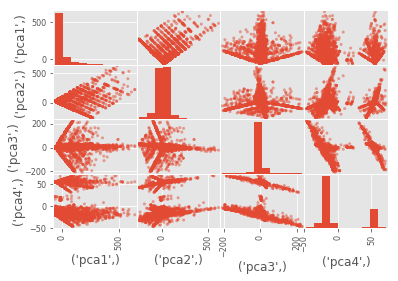

In [270]:
newX = pd.DataFrame(newX)
newX.columns= [['pca1', 'pca2', 'pca3', 'pca4']]
newX.head(2)

plt.figure(figsize=(50,50))
pd.scatter_matrix(newX)
plt.show()

In [271]:
newKN=[]
for i in range(2,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNNcv = cross_val_score(KNN, newX, newtarget, cv=5, scoring='accuracy')
    newKN.append(KNNcv.mean())
print(newKN)

newRF = RandomForestClassifier()
newRFcv = cross_val_score(newRF, newX, newtarget, cv=5, scoring='accuracy')
print('RF 5fold Score : ', newRFcv.mean())

newLR = LogisticRegression()
newLRcv = cross_val_score(newLR, newX, newtarget, cv=5, scoring='accuracy')
print('LR 5fold score: ', newLRcv.mean())


[0.3657599312288806, 0.38605602276439815, 0.38605867840823677, 0.38699287853131314, 0.387994592811784, 0.39320240643155524, 0.38752808243464365, 0.38799311979822504, 0.3873915155948196]
RF 5fold Score :  0.396672697471308
LR 5fold score:  0.30740249686306553
